<a href="https://colab.research.google.com/github/janvi432/Final-Portfolio-Regression-Task/blob/main/2513327_JanviPradhanang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Janvi Pradhanang

Student ID: 2513327

**Analysis of Machine Learning Models for Predicting Concrete Compressive Strength**

In [13]:
# Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


In [14]:
# Load the dataset
df = pd.read_csv('concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Dataset Description**

**Dataset Name:** Concrete Compressive Strength Dataset


**1.   Dataset Creation**


*   Originally created by Yeh, I-Cheng for academic research on concrete strength prediction.

*   Published in 1998.

*   Later uploaded and maintained on Kaggle by Ahiale Darlington.


**2.   Data Source and Access**

*   Accessed from Kaggle.
*   [Concrete Compressive Strength Dataset](https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set)

*   Loaded into a pandas DataFrame using read_csv().










**3.  Alignment with UNSDG**


*   This dataset aligns with **UNSDG 9 (Industry, Innovation, and Infrastructure)** as it enables the prediction of concrete compressive strength, which supports the design of durable and safe infrastructure. Accurate strength estimation helps optimize material usage, reduce waste, and improve construction quality, contributing to sustainable industrial development.




**4. Dataset Attributes**


1.   cement : Cement content (kg/m³)

2.   blast_furnace_slag : Blast furnace slag (kg/m³)

3.   fly_ash : Fly ash content (kg/m³)

4.   water : Water content (kg/m³)

5.   superplasticizer : Superplasticizer amount (kg/m³)

6.   coarse_aggregate : Coarse aggregate (kg/m³)

7.   fine_aggregate : Fine aggregate (kg/m³)

8.   age : Age of concrete (days)

9.   concrete_compressive_strength : Target variable – strength (MPa)

**5.  Potential Questions**

*   Which materials contribute most to higher concrete strength?

*   How does age affect concrete compressive strength?

*   Can compressive strength be accurately predicted from mix components?





**Initial Dataset Exploration**

In [15]:
# Dataset shape
print("Rows, Columns:", df.shape)

Rows, Columns: (1030, 9)


In [16]:
# Dataset types
print("Column Data Types (Before Conversion):")
df.dtypes

Column Data Types (Before Conversion):


,0
cement,float64
blast_furnace_slag,float64
fly_ash,float64
water,float64
superplasticizer,float64
coarse_aggregate,float64
fine_aggregate,float64
age,int64
concrete_compressive_strength,float64


In [17]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [18]:
# Missing value
df.isnull().sum()

,0
cement,0
blast_furnace_slag,0
fly_ash,0
water,0
superplasticizer,0
coarse_aggregate,0
fine_aggregate,0
age,0
concrete_compressive_strength,0




*   **Dataset Quality Assessment**

    No missing values were detected, and all attributes are numeric, indicating good data completeness and consistency. The features represent concrete mix components and curing age, which are directly relevant to predicting compressive strength. The target variable is also continuous making the dataset well-suited for regression analysis.


**1.   Exploratory Data Analysis (EDA) - Data Cleaning:**

In [19]:
# Summary statistics
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


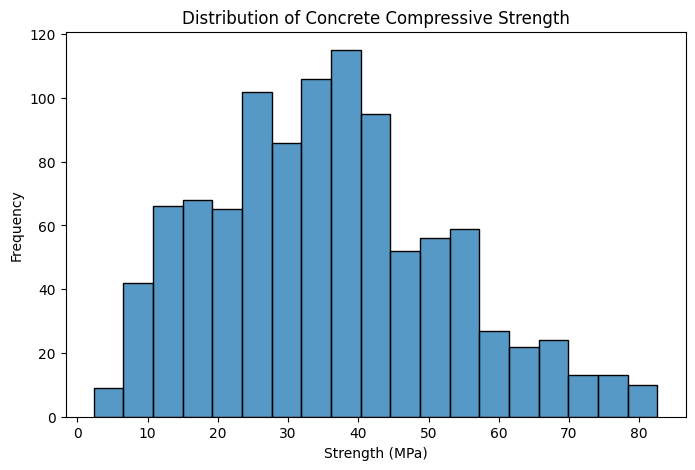

In [20]:
#Histogram for Distribution of Target Variable
plt.figure(figsize=(8,5))
sns.histplot(df["concrete_compressive_strength"])
plt.title("Distribution of Concrete Compressive Strength")
plt.xlabel("Strength (MPa)")
plt.ylabel("Frequency")
plt.show()



*   The histogram illustrates the frequency distribution of concrete compressive strength values.The distribution is slightly right-skewed, with the majority of observations concentrated between 30 MPa and 40 MPa. Strength values range from near 0 MPa to above 80 MPa, indicating wide variation in concrete strength.



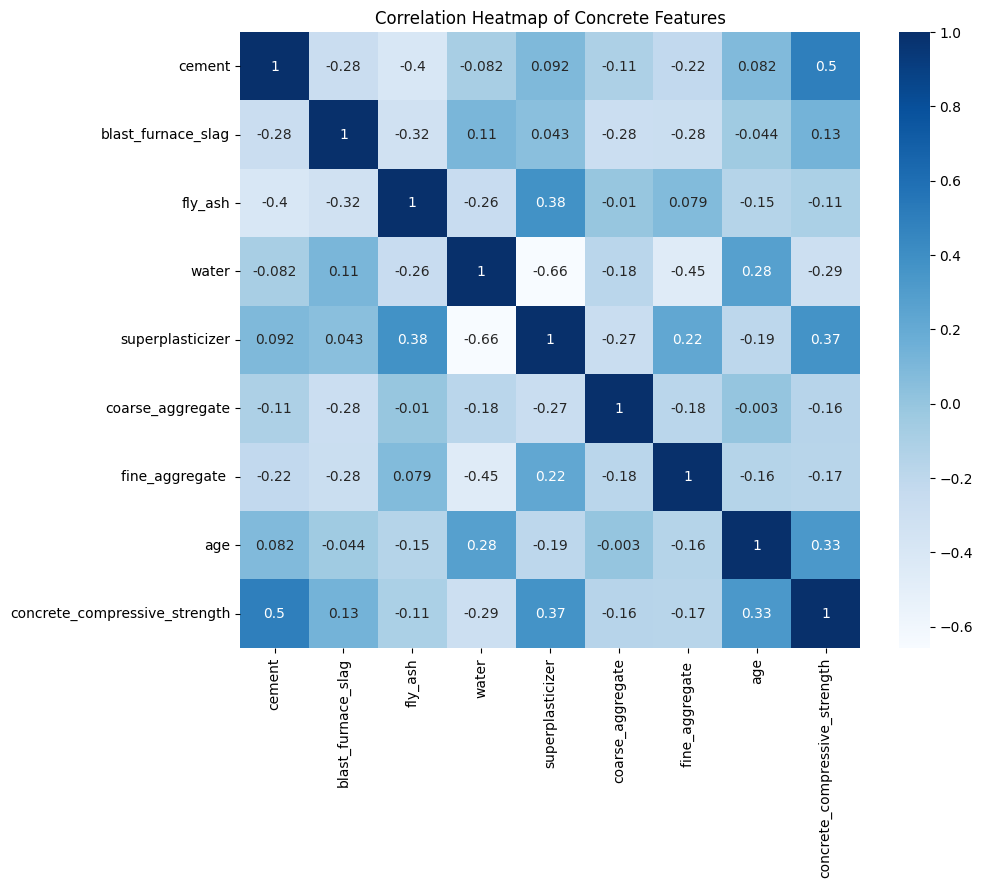

In [21]:
# Correlation heatmap of features and target
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Concrete Features')
plt.show()



*   The correlation heatmap shows the linear relationship between the variables. Cement has the strongest positive correlation with compressive strength (r ≈ 0.5), meaning higher cement content generally leads to higher strength. Water shows a negative correlation
(r ≈ −0.29), confirming that increasing water content tends to reduce concrete strength.



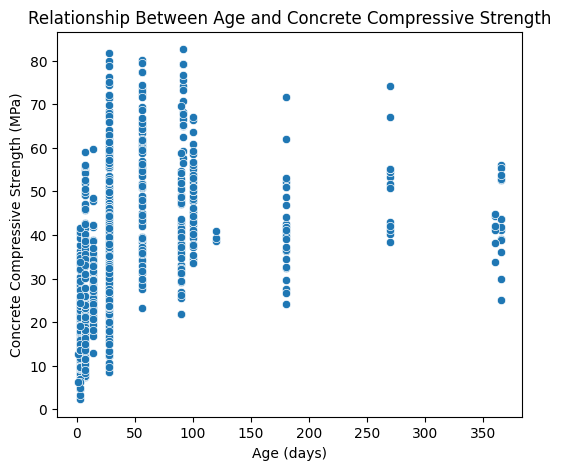

In [22]:
# Scatter Plot of Age vs Concrete Compressive Strength
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df['age'], y=df['concrete_compressive_strength'])
plt.title('Relationship Between Age and Concrete Compressive Strength')
plt.xlabel('Age (days)')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.show()



*   The scatter plot illustrates the effect of curing age on concrete strength. Strength increases rapidly in the early days, particularly up to 28 days, and then continues to rise more slowly as the concrete matures.This demonstrates a clear positive growth trend, meaning concrete continues to harden and gain strength over time.



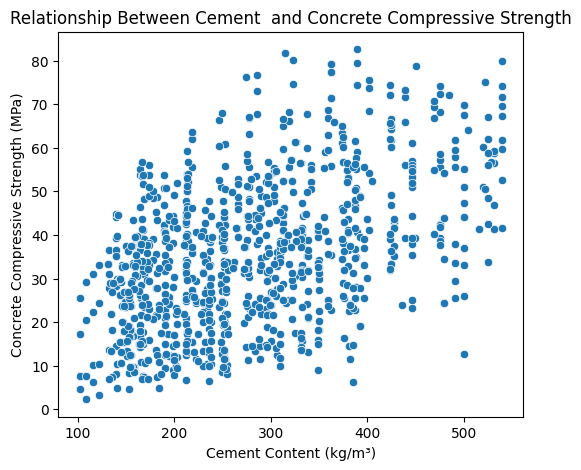

In [23]:
# Scatter Plot of Cement Content vs Concrete Compressive
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df['cement'], y=df['concrete_compressive_strength'])
plt.title('Relationship Between Cement  and Concrete Compressive Strength')
plt.xlabel('Cement Content (kg/m³)')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.show()



*   This figure highlights the relationship between cement content and compressive strength. Strength generally increases as cement content increases, making cement the most important factor. However, the spread of points at higher cement levels shows that other factors, like water content and additives, also affect the final strength.



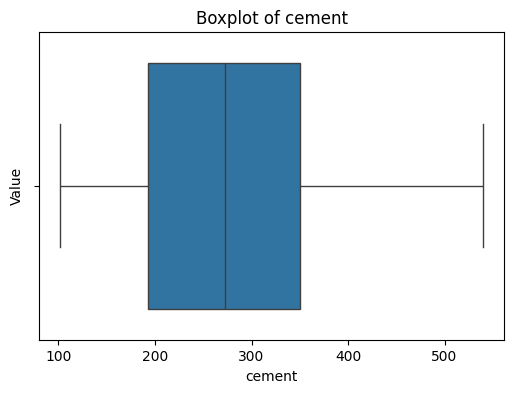

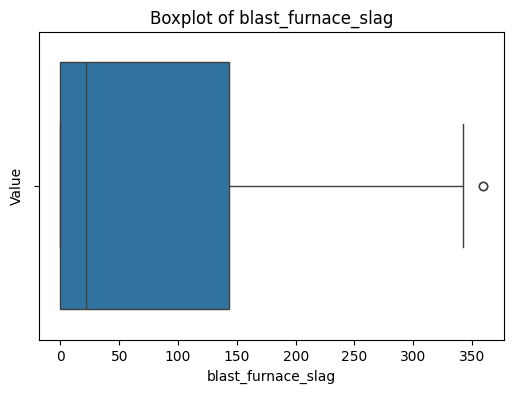

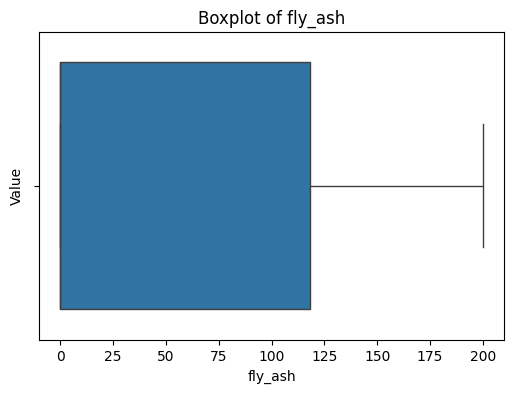

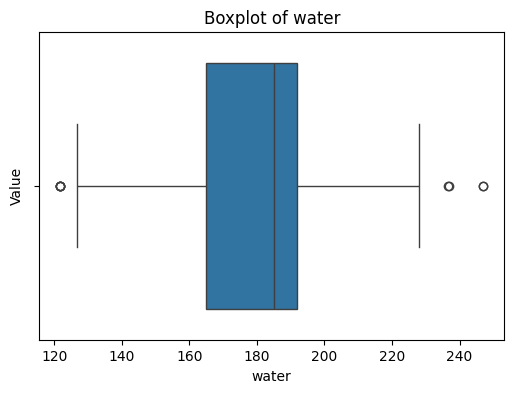

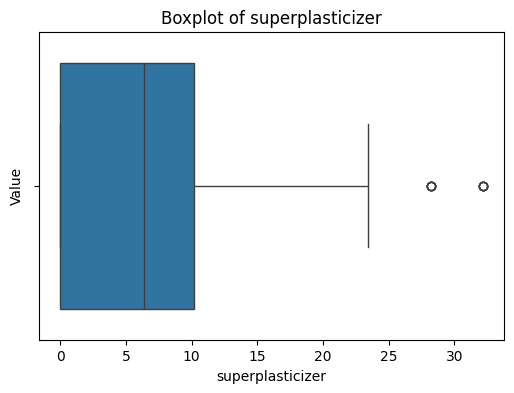

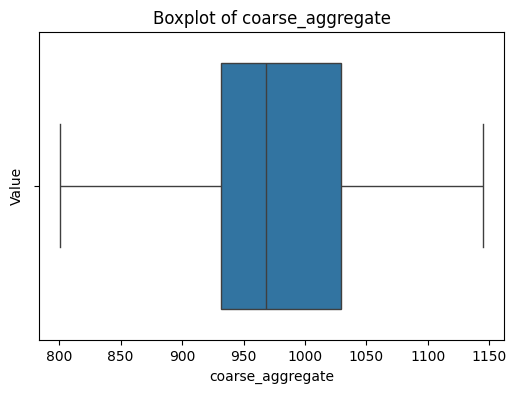

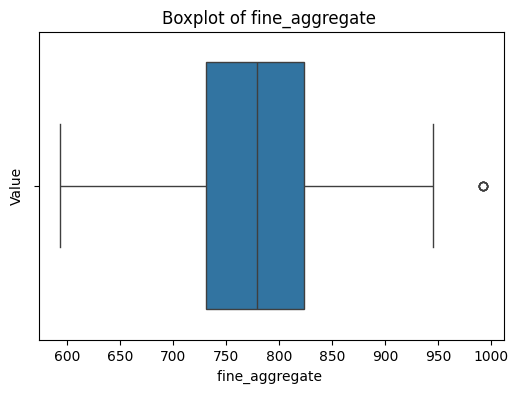

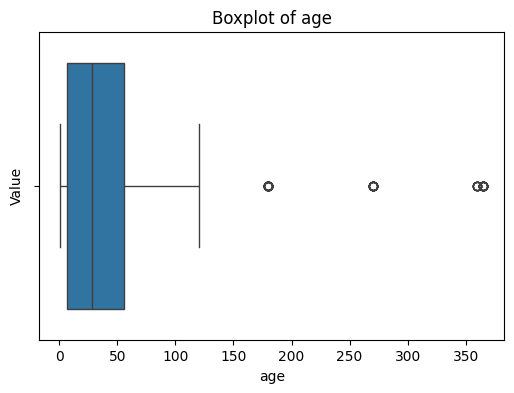

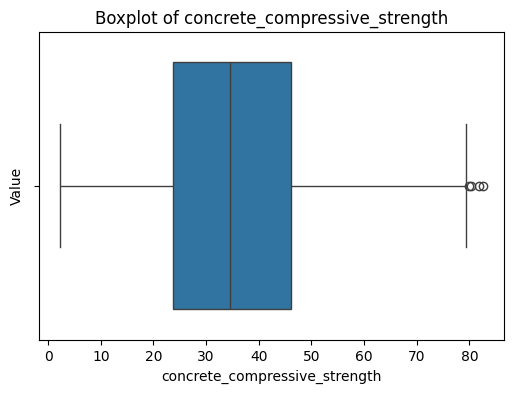

In [24]:
# Boxplot
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])

    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')

    plt.show()



*   The boxplot illustrates the spread and outliers of each feature. Most features, like cement and aggregates, are fairly balanced with few outliers. Age, water, and superplasticizer have some high outliers, which come from special mixes or longer curing times. Blast furnace slag and fly ash have many zeros because they were not used in every mix.



In [25]:
X = df.drop(columns="concrete_compressive_strength")
y = df["concrete_compressive_strength"]

In [26]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

**2. Neural Network (MLPRegressor)**

In [28]:
# Define MLP architecture
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # 2 hidden layers: 64 neurons, 32 neurons
    activation='relu',             # ReLU activation for hidden layers
    solver='adam',
    max_iter=3000,
    random_state=42
)

# Train the model
mlp.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=3000, random_state=42)



*   A Multi-Layer Perceptron (MLP) regressor was implemented to predict concrete compressive strength. The network consists of an input layer corresponding to the features, followed by two hidden layers with 64 and 32 neurons using ReLU activation. The output layer has a single neuron with linear activation to predict continuous strength values. The model was trained using the Adam optimizer with mean squared error as the loss function. Model performance was evaluated on both training and test sets using RMSE and R² metrics.



In [29]:
# Predict on training set
y_train_pred_mlp = mlp.predict(X_train_scaled)

rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_pred_mlp))
r2_train_mlp = r2_score(y_train, y_train_pred_mlp)

print("Training RMSE:", rmse_train_mlp)
print("Training R²:", r2_train_mlp)

Training RMSE: 3.6937922098900327
Training R²: 0.9519720011805735


In [30]:
# Predict on test set
y_test_pred_mlp = mlp.predict(X_test_scaled)

rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_pred_mlp))
r2_test_mlp = r2_score(y_test, y_test_pred_mlp)

print("Test RMSE:", rmse_test_mlp)
print("Test R²:", r2_test_mlp)


Test RMSE: 5.810206114841781
Test R²: 0.8689890485510445



**3. Classical ML Models: Linear Regression and Random Forest Regressor**


In [31]:
# Linear Regression (Original Model)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on test set
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate using required metrics
mse_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
r2_lr = r2_score(y_test, y_test_pred_lr)

print("Linear Regression - Original Model")
print("Test MSE:", mse_lr)
print("Test RMSE:", rmse_lr)
print("Test MAE:", mae_lr)
print("Test R²:", r2_lr)

Linear Regression - Original Model
Test MSE: 95.97094009110683
Test RMSE: 9.79647590162436
Test MAE: 7.745559243921434
Test R²: 0.627553179231485


In [32]:
# Random Forest Regressor (Original Model)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate using required metrics
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Regressor - Original Model")
print("Test MSE:", mse_rf)
print("Test RMSE:", rmse_rf)
print("Test MAE:", mae_rf)
print("Test R²:", r2_rf)


Random Forest Regressor - Original Model
Test MSE: 29.847015251758403
Test RMSE: 5.463242192302882
Test MAE: 3.734132387309294
Test R²: 0.8841688335094583




*   Two regression models were implemented which includes Linear Regression and Random Forest Regressor.

    The Random Forest Regressor performs better than Linear Regression, achieving lower errors and higher R². This indicates it captures complex, non-linear relationships in the data.

**4. Hyper-parameter Optimization with Cross-Validation**

In [33]:
# Linear Regression Hyperparameter Grid
param_grid_lr = {
    'fit_intercept': [True, False],
}

grid_lr = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid_lr,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_lr.fit(X_train_scaled, y_train)

print("Best Linear Regression Parameters:", grid_lr.best_params_)
print("Best Linear Regression CV R²: ", grid_lr.best_score_)

y_pred_lr_tuned = grid_lr.best_estimator_.predict(X_test_scaled)

Best Linear Regression Parameters: {'fit_intercept': True}
Best Linear Regression CV R²:  0.5946055391992531


In [34]:
# Random Forest Hyperparameter Grid
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_rf.fit(X_train_scaled, y_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)
print(f"Best Random Forest CV R²: ", grid_rf.best_score_)

y_pred_rf_tuned = grid_rf.best_estimator_.predict(X_test_scaled)

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest CV R²:  0.9069203897838888




*   Hyperparameter tuning was performed using GridSearchCV for both models. For Linear Regression, the best parameter was fit_intercept=True, achieving a cross-validation R² of 0.595. For the Random Forest Regressor, the optimal hyperparameters were n_estimators=100, max_depth=None, and min_samples_split=2, resulting in a higher cross-validation R² of 0.907. Overall, the Random Forest model benefited more from hyperparameter optimization compared to Linear Regression.



**5. Feature Selection**

In [35]:
# Linear Regression
lr_best = LinearRegression(**grid_lr.best_params_)

rfe_lr = RFE(estimator=lr_best, n_features_to_select=5)
rfe_lr.fit(X_train_scaled, y_train)

# Get selected features
selected_features_lr = X_train_scaled.columns[rfe_lr.support_]
print("Selected Features (Linear Regression):", selected_features_lr)

Selected Features (Linear Regression): Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'age'], dtype='object')


In [36]:
# Random Forest Regressor
best_rf_model = RandomForestRegressor(**grid_rf.best_params_, random_state=42)

rfe_rf = RFE(estimator=best_rf_model, n_features_to_select=5)
rfe_rf.fit(X_train_scaled, y_train)

# Get selected features
selected_features_rf = X_train_scaled.columns[rfe_rf.support_]
print("Selected Features (Random Forest Regressor):", selected_features_rf)

Selected Features (Random Forest Regressor): Index(['cement', 'blast_furnace_slag', 'water', 'superplasticizer', 'age'], dtype='object')




*    Recursive Feature Elimination (RFE) was applied to both Linear Regression and Random Forest Regressor to select the top 5 features.                                       RFE ranks features by importance using coeficients for Linear Regression and feature importance for Random Forest—allowing the models to retain the most influential variable.

*    For Linear Regression, the selected features were cement, blast furnace slag, fly ash, water, and age, while for Random Forest, they were cement, blast furnace slag, water, superplasticizer, and age.



**6. Final Models and Comparative Analysis**

In [37]:
# Final linear Regression Model
X_train_lr_fs = X_train_scaled[selected_features_lr]
X_test_lr_fs = X_test_scaled[selected_features_lr]

# Train the model
final_lr_model = LinearRegression(**grid_lr.best_params_)
final_lr_model.fit(X_train_lr_fs, y_train)

y_pred_final_lr = final_lr_model.predict(X_test_lr_fs)

# Evaluate
rmse_lr_final = np.sqrt(mean_squared_error(y_test, y_pred_final_lr))
r2_lr_final = r2_score(y_test, y_pred_final_lr)

print(" Linear Regression - Final Model ")
print("Test RMSE:", rmse_lr_final)
print("Test R²:", r2_lr_final)

 Linear Regression - Final Model 
Test RMSE: 9.762335992210277
Test R²: 0.630144548814515


In [38]:
# Final Random Forest Model
X_train_rf_fs = X_train_scaled[selected_features_rf]
X_test_rf_fs = X_test_scaled[selected_features_rf]

# Train the model
final_rf_model =  RandomForestRegressor(**grid_rf.best_params_, random_state=42)
final_rf_model.fit(X_train_rf_fs, y_train)

y_pred_final_rf = final_rf_model.predict(X_test_rf_fs)

# Evaluate
rmse_rf_final = np.sqrt(mean_squared_error(y_test, y_pred_final_rf))
r2_rf_final = r2_score(y_test, y_pred_final_rf)

print(" Random Forest Final Model")
print("Test RMSE:", rmse_rf_final)
print("Test R²:", r2_rf_final)

 Random Forest Final Model
Test RMSE: 5.345820408653701
Test R²: 0.8890944571798158


In [41]:
models_info = [

    # Original Models
    ("Linear Regression - Original", y_test_pred_lr, X_train_scaled.shape[1], None),
    ("Random Forest - Original", y_test_pred_rf, X_train_scaled.shape[1], None),

    # Tuned Models
    ("Linear Regression - Tuned", y_pred_lr_tuned, X_train_scaled.shape[1], grid_lr.best_score_),
    ("Random Forest - Tuned", y_pred_rf_tuned, X_train_scaled.shape[1], grid_rf.best_score_),

    # Final Models
    ("Linear Regression - Final", y_pred_final_lr, X_train_lr_fs.shape[1], None),
    ("Random Forest - Final", y_pred_final_rf, X_train_rf_fs.shape[1], None)
]

In [42]:
comparison_table = pd.DataFrame([
    {
        "Model": name,
        "Features Used": features,
        "CV Score": cv if cv is not None else None,
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Test R²": r2_score(y_test, y_pred),
    }
    for name, y_pred, features, cv in models_info
])

# Display the table
comparison_table


,Model,Features Used,CV Score,Test RMSE,Test R²
0,Linear Regression - Original,8,NaN,9.796476,0.627553
1,Random Forest - Original,8,NaN,5.463242,0.884169
2,Linear Regression - Tuned,8,0.594606,9.796476,0.627553
3,Random Forest - Tuned,8,0.906920,5.463242,0.884169
4,Linear Regression - Final,5,NaN,9.762336,0.630145
5,Random Forest - Final,5,NaN,5.345820,0.889094


*   Overall, The comparison of all models shows that Random Forest consistently outperforms Linear Regression across all stages.